<a href="https://colab.research.google.com/github/Rebex3000/variableextract/blob/main/AIRCentre_landusechange.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!DOCTYPE html>
<html>
<body>
  <h1>Extract Land Use and Land Cover (LULC) from raster file</h1>
  <p>Kennedy, C. M., J. R. Oakleaf, D. M. Theobald, S. Baruch-Mordo, and J. Kiesecker. 2020. Global Human Modification of Terrestrial Systems. Palisades, New York: NASA Socioeconomic Data and Applications Center (SEDAC). https://doi.org/10.7927/edbc-3z60. Accessed: 01.04.2023</p>

  <img src="https://sedac.ciesin.columbia.edu/geoserver/ows?service=WMS&version=1.1.0&request=GetMap&bbox=-180,-60,180,85&width=375&height=151&srs=EPSG:4326&format=image%2Fpng&transparent=true&layers=lulc:lulc-human-modification-terrestrial-systems,cartographic:national-boundaries">

  <p>Variable: land use change index (0-1)</p>
  <p>Resolution of tiff file: 1 km</p>
  <p>Based on modeling the physical extents of 13 anthropogenic stressors and their estimated impacts using spatially-explicit global data sets with a median year of 2016.
  <p>Source link: <a> https://sedac.ciesin.columbia.edu/data/set/lulc-human-modification-terrestrial-systems</a></p>

  <p>Extract variables for whole countries based on country borders from shape file.</p>
  <p>Requirements:</p>
  <ul>
    <li>Shapefile with country borders of the whole world with column "AREAID"</li>
    <li>Table with column "AREAID"</li>
  </ul>
</body>
</html>


In [ ]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
pip install geopandas

In [ ]:
pip install rasterstats

In [ ]:
pip install rasterio

In [ ]:
# import packages
import pandas as pd
import geopandas as gpd
from rasterstats import zonal_stats
import rasterio
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import Normalize, ListedColormap

# Test files
Own test file paths must be inserted here:

In [ ]:
# load test files with less entries
# table
# df = pd.read_csv('/content/drive/MyDrive/AIRCentre/introductions_test.csv')
# print(df.head())
# shapefile that has only some regions in Europe
#shapefile = gpd.read_file('/content/drive/MyDrive/AIRCentre/my_few_worldregions.shp')
# print(shapefile.head())

# Actual files
Own actual file paths must be inserted here:

In [ ]:
# load actual files
# table
df = pd.read_csv('/content/drive/MyDrive/AIRCentre/aedesalbopictus.csv')
print(df.head())
# shapefile with worldregions
shapefile = gpd.read_file('/content/drive/MyDrive/AIRCentre/my_global_regions_rebecca230303.shp')
print(shapefile.head())


   SPECIESID           SPECIES AREAID  ISO                            NAME_0  \
0          1  Aedes albopictus   A505  USA               USA (North America)   
1          2  Aedes albopictus   A501  BRA  Brazil (Central & South America)   
2          3  Aedes albopictus   A224  ALB                  Albania (Europe)   
3          4  Aedes albopictus   A328  ITA                    Italy (Europe)   
4          5  Aedes albopictus   A295  FRA                   France (Europe)   

   YEAR  PERIOD                               ORIGIN ESTABLISHED  \
0  1946    1940                   Philippines (Asia)           Y   
1  1986    1980                               (Asia)           Y   
2  1989    1980                         China (Asia)           Y   
3  1990    1990                  USA (North America)           Y   
4  1999    1990  Japan (Asia) or USA (North America)           Y   

  dispersal_pathway  
0        Used tyres  
1        Used tyres  
2        Used tyres  
3        Used tyres  


# Land Use and Land Cover (LULC)
Variable: lulc index, median year 2016, with 0 not modified at all and 1 completely modified <br>
Resolution of tiff file: 1km <br>
Source link:  https://sedac.ciesin.columbia.edu/data/set/lulc-human-modification-terrestrial-systems <br>
Download file from link, add to drive and paste file path here: <br>

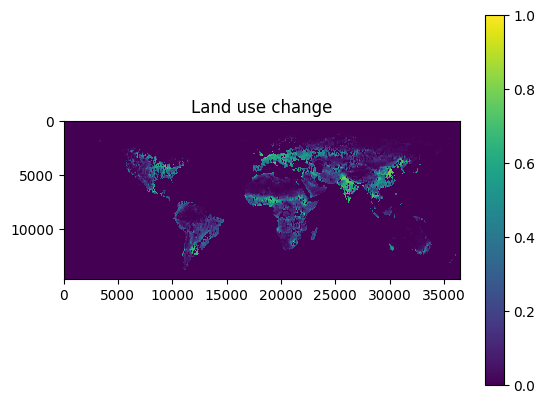

In [ ]:
# Load the TIFF file for worldpopulation
tiff_path = '/content/drive/MyDrive/AIRCentre/lulc-human-modification-terrestrial-systems_geographic.tif'
with rasterio.open(tiff_path, crs=shapefile.crs) as src:
    tiff_crs = src.crs
    # Read the image data
    tiff_data = src.read(1)
    # Plot the image with colors between 0 and 1
    plt.imshow(tiff_data, cmap='viridis', vmin=0, vmax=1)
    plt.colorbar()
    plt.title('Land use change')
    plt.show()


In [ ]:
# Reproject the shapefile to match the CRS of the TIFF file
shapefile_reproj = shapefile.to_crs(tiff_crs)

In [ ]:
# initialize the list of population density
lulc = []

# loop through each entry in the table (df)
for index, row in df.iterrows():

    # extract relevant data from the row
    area_id = row['AREAID']
    country_code = row['NAME_0']

    # select the relevant region from the shapefile
    region = shapefile_reproj.loc[shapefile_reproj['AREAID'] == area_id].iloc[0]

    # zonal statistics
    # extract mean lulc index for region from the tiff file
    with rasterio.open(tiff_path, crs=shapefile.crs) as src:
        affine = src.transform
        stats = zonal_stats(region.geometry, tiff_path, affine=affine, stats=['mean'])
        lulc.append(stats[0]['mean'])
        print(country_code)
        print(stats[0]['mean'])


# append list of mean population density to the initial table as column
df['LULC'] = lulc


USA (North America)
0.19194216558990992
Brazil (Central & South America)
0.15620645591958132
Albania (Europe)
0.3881365770764159
Italy (Europe)
0.5679144619002395
France (Europe)
0.49570750329209284
Guam (Australasia & Pacific Islands)
0.5108178039937896
Indonesia (Australasia & Pacific Islands)
0.22945165234413356
Papua New Guinea (Australasia & Pacific Islands)
0.1720986809745435
Solomon Islands (Australasia & Pacific Islands)
0.11381545788393643
Mexico (North America)
0.25725357980937597
Fiji (Australasia & Pacific Islands)
0.1665356243202006
Palestine (Middle East)
0.6729245534207863
Cuba (Central & South America)
0.32905762223469265
Cayman Islands (Central & South America)
0.4520216262880176
Dominican Republic (Central & South America)
0.3533426455589963
Colombia (Central & South America)
0.17362714366957793
Argentina (Central & South America)
0.235986202992883
Honduras (Central & South America)
0.24732029997284435
Montenegro (Europe)
0.316729793676594
Greece (Europe)
0.4283508564

# Export Result

In [ ]:
# save the DataFrame to an Excel file
df.to_excel('/content/drive/MyDrive/AIRCentre/population_density.xlsx', index=False)
